In [36]:
from src.preprocessing.dataLoader_CelebA import get_partitioned_dataloaders, get_siamese_dataloader
from src.ml.resNet50 import SiameseResNet
from src.ml.losses import ContrastiveLoss
import torch

# 1. Load the data

In [48]:
IMAGE_DIR = "data/celeba/img_align_celeba"
LABEL_FILE = "data/celeba/identity_CelebA.txt"
PARTITION_FILE = "data/celeba/list_eval_partition.csv"
IMG_SIZE = 224
BATCH_SIZE = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [49]:
train_loader, val_loader, test_loader = get_partitioned_dataloaders(image_dir= IMAGE_DIR,
                                                               label_file= LABEL_FILE,
                                                               partition_file= PARTITION_FILE,
                                                               batch_size=BATCH_SIZE,
                                                               img_size=224)


Label: tensor([0.])


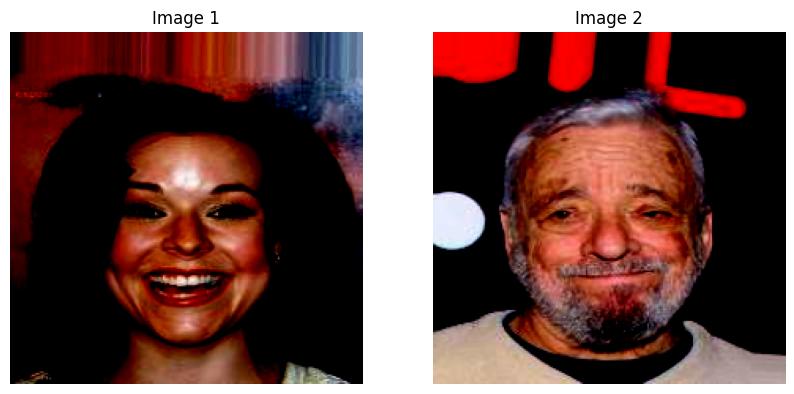

In [50]:
# Get one sample from the dataloader
dataiter = iter(test_loader)
img1, img2, label = next(dataiter)

# If you want to visualize the images, you can use matplotlib
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# For each image, we need to move the channels to the end and convert to numpy
# Assuming the images are in format (batch_size, channels, height, width)
img1_display = img1[0].permute(1, 2, 0).cpu().numpy()
img2_display = img2[0].permute(1, 2, 0).cpu().numpy()
print("\nLabel:", label[0])
# Display images
ax1.imshow(img1_display)
ax1.set_title('Image 1')
ax1.axis('off')

ax2.imshow(img2_display)
ax2.set_title('Image 2')
ax2.axis('off')

plt.show()

# Loss Function

In [51]:
constructive_loss = ContrastiveLoss(margin=2.0)

# Create the model

In [52]:
model = SiameseResNet()

# Train Model

In [53]:
model.train_model_constructive(train_loader= dataiter,
                                 val_loader = None,
                                 criterion = constructive_loss,
                                 learning_rate = 0.001,
                                 num_epochs = 1,
                                 device = DEVICE,
                                 experiment_name = 'SiameseResNet',
                                 training_mode= True)

Epoch 1/1:   0%|          | 2/624 [00:29<2:34:46, 14.93s/it, loss=0.00362]


KeyboardInterrupt: 

# Plot the results

In [21]:
! mlflow ui --port 5000

[2025-05-25 11:59:44 +0200] [10013] [INFO] Starting gunicorn 23.0.0
[2025-05-25 11:59:44 +0200] [10013] [INFO] Listening at: http://127.0.0.1:5000 (10013)
[2025-05-25 11:59:44 +0200] [10013] [INFO] Using worker: sync
[2025-05-25 11:59:44 +0200] [10014] [INFO] Booting worker with pid: 10014
[2025-05-25 11:59:44 +0200] [10015] [INFO] Booting worker with pid: 10015
[2025-05-25 11:59:44 +0200] [10016] [INFO] Booting worker with pid: 10016
[2025-05-25 11:59:44 +0200] [10017] [INFO] Booting worker with pid: 10017
^C
[2025-05-25 12:01:59 +0200] [10013] [INFO] Handling signal: int
[2025-05-25 12:01:59 +0200] [10017] [INFO] Worker exiting (pid: 10017)
[2025-05-25 12:01:59 +0200] [10015] [INFO] Worker exiting (pid: 10015)
[2025-05-25 12:01:59 +0200] [10016] [INFO] Worker exiting (pid: 10016)
[2025-05-25 12:01:59 +0200] [10014] [INFO] Worker exiting (pid: 10014)
